# Whole Genome TWAS w/f fusion and susie

## Steps

### WG Fusion Wgt computation

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/AC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 40 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &
   
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/PCC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 40 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &
  
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/DLPFC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 200 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &

### prior with postive constraint
The codes used to produce the postive constraint: See the corresponding sections in Whole Genome prior estimation.ipynb


In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/wg_prior_genome.ipynb flash \
--molecular_pheno_dir /home/hs3163/Project/Genome_prior/data/molc_dir    \
--rds_list /home/hs3163/Project/Genome_prior/data/rds_list  \
--wd   /home/hs3163/Project/Genome_prior/constriant \
--name "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--constraint "Constraint" \
-s build &

nohup sos run ~/GIT/neuro-twas/Workflow/wg_prior_genome.ipynb ed \
--molecular_pheno_dir /home/hs3163/Project/Genome_prior/data/molc_dir    \
--rds_list /home/hs3163/Project/Genome_prior/data/rds_list  \
--wd   /home/hs3163/Project/Genome_prior/constriant \
--name "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--constraint "Constraint" \
-s build &



In [ ]:
### MV_susie with postive constraint prior for whole genome with teem

nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv    \
--molecular_pheno_dir "/home/hs3163/Project/Alz_WG/mv_wg/molecular_phenotype_list"   \
--region_list "/home/hs3163/Project/Alz_WG/mv_wg/wg_rds_list"  \
--wd "/home/hs3163/Project/Alz_WG/mv_wg"  \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename"  \
--container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE  --job_size 1 \
--cv_times 100  \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds'\
-J 6 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &


/home/hs3163/Project/




nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv --molecular_pheno_dir "/home/hs3163/Project/Alz_WG/mv_wg/molecular_phenotype_list" --region_list "/home/hs3163/Project/Alz_WG/mv_wg/wg_rds_list" --wd "" --name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE --job_size 1 --cv_times 100 --mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' -J 100 -q csg -c ~/GIT/neuro-twas/template/csg.yml csg.yml -s build &



### MV_susie with postive constraint

In [ ]:
sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv --molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./   --name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container gaow/twas --impute TRUE --cv_times 2  &



nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --job_size 1 --cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &


nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test \
--gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt  \
--molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
--wd /home/hs3163/Project/Alz/multi_mp/wgt/AC/ \
--genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
--region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
--region_name 1   --data_start 2   --window 500000 \
--weights_path /home/hs3163/Project/Alz/multi_mp/wgt/AC  \
--weights_list /home/hs3163/Project/Alz/multi_mp/wgt/AC/All_wgt_list.txt \
--container /mnt/mfs/statgen/containers/twas_latest.sif   --job_size 1  --asso_mem "50G"   -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml   -s build &




In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &




nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/rds_bf" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# TWAS for MV susie

Transforming the susie result into wgt RDat file


In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf \
--molecular_pheno_dir mole_pheno_ls   --region_list wg_rds_list_final  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &

nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list to_be_cv_rg_ls  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &




# Removed the 28 genes that produced error of dim(x) = 0

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf \
--molecular_pheno_dir mole_pheno_ls   --region_list wg_rds_list_final  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


# Association test for the transformed wgt RDat file

In [ ]:

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q neurology -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &





# Filter out the snps

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb snp_exclude \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--bed_list "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/" \
--extract_snp "~/Project/Alz/data/AD_sumstats_SNP" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# redo MV_susie

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list_final" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# CV for the genes with sig TWAS result

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/to_be_cv_rg_ls" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# Whole Genome TWAS Data analysis

In [3]:
library(dplyr)
library(tibble)
library(readr)
library(ggplot2)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [308]:

dir = "/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/"
Proj = c("DLPFC","AC","PCC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA",ID %in% working$ID)%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))%>%filter()),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)

Parsed with column specification:
cols(
  .default = col_character(),
  PANEL = col_logical(),
  CHR = col_double(),
  P0 = col_double(),
  P1 = col_double(),
  HSQ = col_double(),
  BEST.GWAS.ID = col_double(),
  EQTL.ID = col_logical(),
  EQTL.R2 = col_logical(),
  EQTL.Z = col_logical(),
  EQTL.GWAS.Z = col_logical(),
  MODELCV.R2 = col_logical(),
  MODELCV.PV = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“252 parsing failures.
 row   col           expected actual                                                                       file
1691 PANEL 1/0/T/F/TRUE/FALSE  PANEL '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result/all_result.txt'
1691 CHR   a double            CHR   '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result/all_result.txt'
1691 P0    a double            P0    '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result/all_result.txt'
1691 P1    a double            P1    '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_

In [307]:
sum((analysis2$result_data_TWAS[[1]]%>%filter(TWAS.P.Adj < 0.05)%>%pull(ID))%in%(analysis$result_data_TWAS[[1]]%>%filter(TWAS.P.Adj < 0.05)%>%pull(ID)))

working$ID

[1] 2

[1] "ENSG00000002587" "ENSG00000007047" "ENSG00000007255" "ENSG00000022277"
  [5] "ENSG00000029725" "ENSG00000064666" "ENSG00000064687" "ENSG00000065268"
  [9] "ENSG00000066923" "ENSG00000069399" "ENSG00000070388" "ENSG00000073008"
 [13] "ENSG00000073921" "ENSG00000077454" "ENSG00000078487" "ENSG00000085514"
 [17] "ENSG00000087589" "ENSG00000095970" "ENSG00000099365" "ENSG00000099377"
 [21] "ENSG00000099817" "ENSG00000100599" "ENSG00000101138" "ENSG00000103496"
 [25] "ENSG00000103507" "ENSG00000103510" "ENSG00000103549" "ENSG00000103642"
 [29] "ENSG00000104228" "ENSG00000104853" "ENSG00000104856" "ENSG00000104859"
 [33] "ENSG00000104866" "ENSG00000104884" "ENSG00000104936" "ENSG00000105383"
 [37] "ENSG00000106261" "ENSG00000106290" "ENSG00000106327" "ENSG00000106330"
 [41] "ENSG00000106351" "ENSG00000108509" "ENSG00000108523" "ENSG00000108559"
 [45] "ENSG00000108798" "ENSG00000110077" "ENSG00000110079" "ENSG00000120885"
 [49] "ENSG00000120899" "ENSG00000120915" "ENSG00000121716" "ENSG00000125746"
 [53] "ENSG00000128923" "ENSG00000129204" "ENSG00000129250" "ENSG00000130202"
 [57] "ENSG00000130203" "ENSG00000130204" "ENSG00000130208" "ENSG00000134463"
 [61] "ENSG00000136717" "ENSG00000137642" "ENSG00000137776" "ENSG00000137845"
 [65] "ENSG00000138613" "ENSG00000140090" "ENSG00000140416" "ENSG00000140678"
 [69] "ENSG00000141503" "ENSG00000142252" "ENSG00000143224" "ENSG00000144230"
 [73] "ENSG00000146826" "ENSG00000146828" "ENSG00000146830" "ENSG00000146833"
 [77] "ENSG00000146834" "ENSG00000147419" "ENSG00000149196" "ENSG00000151006"
 [81] "ENSG00000157450" "ENSG00000158850" "ENSG00000158859" "ENSG00000158864"
 [85] "ENSG00000158869" "ENSG00000159784" "ENSG00000159840" "ENSG00000160813"
 [89] "ENSG00000160862" "ENSG00000161929" "ENSG00000163161" "ENSG00000166128"
 [93] "ENSG00000166508" "ENSG00000166529" "ENSG00000166924" "ENSG00000166925"
 [97] "ENSG00000166997" "ENSG00000167083" "ENSG00000167394" "ENSG00000167395"
[101] "ENSG00000167468" "ENSG00000167840" "ENSG00000168077" "ENSG00000168090"
[105] "ENSG00000168918" "ENSG00000170604" "ENSG00000170684" "ENSG00000173868"
[109] "ENSG00000174469" "ENSG00000177051" "ENSG00000178226" "ENSG00000178386"
[113] "ENSG00000179344" "ENSG00000179846" "ENSG00000180448" "ENSG00000180787"
[117] "ENSG00000185800" "ENSG00000185955" "ENSG00000186567" "ENSG00000186806"
[121] "ENSG00000187244" "ENSG00000188186" "ENSG00000189114" "ENSG00000196118"
[125] "ENSG00000196126" "ENSG00000196388" "ENSG00000196411" "ENSG00000196735"
[129] "ENSG00000197093" "ENSG00000198087" "ENSG00000198502" "ENSG00000198740"
[133] "ENSG00000203710" "ENSG00000204264" "ENSG00000204267" "ENSG00000204287"
[137] "ENSG00000204301" "ENSG00000204304" "ENSG00000204305" "ENSG00000204308"
[141] "ENSG00000204310" "ENSG00000204314" "ENSG00000204516" "ENSG00000205710"
[145] "ENSG00000213420" "ENSG00000213654" "ENSG00000214309" "ENSG00000221838"
[149] "ENSG00000223501" "ENSG00000224389" "ENSG00000234906" "ENSG00000240065"
[153] "ENSG00000241404" "ENSG00000244731" "ENSG00000256294" "ENSG00000258388"
[157] "ENSG00000264538" "ENSG00000265148"

In [313]:
analysis$result_data_TWAS%>%saveRDS("~/mv_susie_cand.rds")

In [303]:
dir2 = "~/Project/Alz/"
tmp = tibble(
  Proj_Name = Proj
)
analysis2 = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result_arch/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!is.na(BEST.GWAS.ID))%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)
analysis_comp = analysis2%>%select(Proj_Name,twas_gene,result_data_TWAS,r2,pval)%>%mutate(
    idx = c(1,3,2),
    susie_r2 = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+3+.y)])),
    susie_pval = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+.y)])),
    sum_data = map2(result_data_TWAS,susie_r2, ~ inner_join(.x,.y )%>%
                    mutate(r2_more = .[,ncol(.)] > MODELCV.R2%>%as.numeric() )),
    sum_data = map2(sum_data,susie_pval, ~ inner_join(.x,.y )%>%
                    mutate(pv_less = .[,ncol(.)] < MODELCV.PV%>%as.numeric() )),
    sum_data = map(sum_data,~.x%>%
                   mutate(both_win = (r2_more & pv_less) ) ),
    pcnt_pv_win = map_dbl(sum_data, ~.x%>%pull(pv_less)%>%na.omit%>%mean()  ),
    pcnt_r2_win = map_dbl(sum_data, ~.x%>%pull(r2_more)%>%na.omit%>%mean()  ),
    pcnt_both_win = map_dbl(sum_data, ~.x%>%filter(both_win )%>%nrow()/nrow(.x) )
    )%>%select(-twas_gene,-idx)
analysis_comp%>%select(Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win)

Parsed with column specification:
cols(
  .default = col_character(),
  PANEL = col_logical(),
  CHR = col_double(),
  P0 = col_double(),
  P1 = col_double(),
  HSQ = col_double(),
  BEST.GWAS.ID = col_double(),
  EQTL.ID = col_logical(),
  EQTL.R2 = col_logical(),
  EQTL.Z = col_logical(),
  EQTL.GWAS.Z = col_logical(),
  MODELCV.R2 = col_logical(),
  MODELCV.PV = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“252 parsing failures.
 row   col           expected actual                                                                            file
1693 PANEL 1/0/T/F/TRUE/FALSE  PANEL '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 CHR   a double            CHR   '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 P0    a double            P0    '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 P1    a double            P1    '/mnt/mfs/statgen/neuro

Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win
<chr>,<dbl>,<dbl>,<dbl>
DLPFC,NaN,NaN,0
AC,NaN,NaN,0
PCC,NaN,NaN,0


In [87]:
total = attach("~/Project/Alz/muti_mp_3/mv_cv.RData")
data = total$output
working = data%>%select(-path)
working = working%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working = working%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]%>%p.adjust( method = "fdr")),
 pval_PCC = map_dbl(model,~.x$pval[2]%>%p.adjust( method = "fdr")),
 pval_DLPFC = map_dbl(model,~.x$pval[3]%>%p.adjust( method = "fdr"))
)

The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 3):

    output




In [ ]:
result_data = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/result/all_result.txt","\t")

In [22]:
result_data%>%filter(!TWAS.Z %in% "     NA")

PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000008118.mv.wgt.RDat,ENSG00000008118,1,209583714,209613939,5.86e-03,1853,3.50,NA,NA,NA,NA,2381,2381,mv_susie,NA,NA,0.7297,0.46554
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000009307.mv.wgt.RDat,ENSG00000009307,1,114716913,114758676,3.68e-05,1740,-3.06,NA,NA,NA,NA,2281,2281,mv_susie,NA,NA,1.1072,0.26820
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000011021.mv.wgt.RDat,ENSG00000011021,1,11806096,11848079,3.31e-03,527,3.85,NA,NA,NA,NA,2921,2921,mv_susie,NA,NA,-0.9225,0.35626
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000020129.mv.wgt.RDat,ENSG00000020129,1,35557473,35567274,8.00e-05,1549,4.35,NA,NA,NA,NA,1833,1833,mv_susie,NA,NA,0.4324,0.66549
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000036549.mv.wgt.RDat,ENSG00000036549,1,77562416,77683419,4.11e-04,911,3.05,NA,NA,NA,NA,2762,2762,mv_susie,NA,NA,0.5151,0.60648
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000040487.mv.wgt.RDat,ENSG00000040487,1,19312326,19329300,1.31e-02,3993,-3.70,NA,NA,NA,NA,3240,3240,mv_susie,NA,NA,1.1860,0.23563
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000053371.mv.wgt.RDat,ENSG00000053371,1,19303965,19312146,1.00e-02,4060,-3.68,NA,NA,NA,NA,3236,3236,mv_susie,NA,NA,0.3238,0.74613
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000053372.mv.wgt.RDat,ENSG00000053372,1,19251805,19260128,4.98e-02,2575,-3.37,NA,NA,NA,NA,3226,3226,mv_susie,NA,NA,-1.3089,0.19056
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000054282.mv.wgt.RDat,ENSG00000054282,1,243256034,243500091,6.20e-02,3236,4.03,NA,NA,NA,NA,2514,2514,mv_susie,NA,NA,0.0829,0.93393


In [247]:
cv_gene = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg//to_be_cv_rg_ls_anno",delim = "\t")
cv_gene = cv_gene%>%select(ID = gene_ID, name = name)

Parsed with column specification:
cols(
  `#chr` = col_double(),
  start_position = col_double(),
  end_position = col_double(),
  gene_ID = col_character(),
  name = col_character()
)



In [317]:
dir = "/mnt/mfs/statgen/neuro-twas/mv_wg/wgt/"
Proj = c("PCC","DLPFC","AC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = as.numeric(MODELCV.PV) ,TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))%>%filter(TWAS.P.Adj < 0.05)%>%inner_join(cv_gene,by = "ID" )),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)



Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



In [144]:
b = c(analysis2$result_data_TWAS[[1]]%>%pull(ID),
analysis2$result_data_TWAS[[2]]%>%pull(ID),
analysis2$result_data_TWAS[[3]]%>%pull(ID) )

In [327]:
analysis$result_data_TWAS[[1]]%>%filter(TWAS.P.Adj < 0.05, CHR == "19")
analysis$result_data_TWAS[[2]]%>%filter(TWAS.P.Adj < 0.05, CHR == "19")
analysis$result_data_TWAS[[3]]%>%filter(TWAS.P.Adj < 0.05, CHR == "19")

PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
NA,ENSG00000007255,19,45162928,45178237,6.71e-05,19:45411941_C_T,52.46,NA,NA,⋯,NA,1383,1383,mv_susie,-0.00250,0.580,-22.81,3.81e-115,1.771650e-113,TRAPPC6A
NA,ENSG00000010310,19,45668221,45683722,4.94e-03,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,0.01200,0.320,8.67,4.33e-18,3.660818e-17,GIPR
NA,ENSG00000011478,19,45692666,45703989,1.02e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,0.00017,0.480,-12.55,3.79e-36,5.874500e-35,QPCTL
NA,ENSG00000012061,19,45407334,45478828,1.46e-02,19:45411941_C_T,52.46,NA,NA,⋯,NA,1505,1505,mv_susie,0.03400,0.220,-4.07,4.63e-05,9.562826e-05,ERCC1
NA,ENSG00000064666,19,1026586,1039068,5.17e-02,19:1050874_A_G,-6.20,NA,NA,⋯,NA,1859,1859,mv_susie,0.11000,0.007,-3.15,1.62e-03,1.731724e-03,CNN2
NA,ENSG00000069399,19,44747705,44760044,1.12e-05,19:45241638_A_G,-15.78,NA,NA,⋯,NA,1376,1376,mv_susie,-0.00410,0.580,2.32,2.04e-02,2.108000e-02,BCL3
NA,ENSG00000073008,19,44643798,44666162,3.00e-02,19:45165912_A_C,10.47,NA,NA,⋯,NA,1408,1408,mv_susie,0.07900,0.025,-7.69,1.45e-14,1.123750e-13,PVR
NA,ENSG00000104853,19,44954585,44993341,3.24e-05,19:45411941_C_T,52.46,NA,NA,⋯,NA,1418,1418,mv_susie,-0.00084,0.530,-13.16,1.52e-39,2.827200e-38,CLPTM1
NA,ENSG00000104856,19,45001449,45038198,1.87e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1387,1387,mv_susie,-0.00330,0.600,-4.54,5.75e-06,1.671094e-05,RELB


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
NA,ENSG00000007255,19,45162928,45178237,2.05e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1383,1383,mv_susie,-0.00260,0.5800,-24.059,6.77e-128,3.148050e-126,TRAPPC6A
NA,ENSG00000010310,19,45668221,45683722,1.66e-02,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,0.02800,0.1200,7.154,8.41e-13,7.110273e-12,GIPR
NA,ENSG00000011478,19,45692666,45703989,3.06e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,0.00100,0.4900,-13.904,5.99e-44,1.114140e-42,QPCTL
NA,ENSG00000012061,19,45407334,45478828,1.45e-02,19:45411941_C_T,52.46,NA,NA,⋯,NA,1505,1505,mv_susie,0.01400,0.2000,-3.795,1.48e-04,2.373103e-04,ERCC1
NA,ENSG00000064666,19,1026586,1039068,1.00e-01,19:1050874_A_G,-6.20,NA,NA,⋯,NA,1859,1859,mv_susie,0.09600,0.0014,-2.950,3.18e-03,3.438837e-03,CNN2
NA,ENSG00000069399,19,44747705,44760044,7.99e-05,19:45241638_A_G,-15.78,NA,NA,⋯,NA,1376,1376,mv_susie,-0.00150,0.5400,4.392,1.12e-05,3.156364e-05,BCL3
NA,ENSG00000073008,19,44643798,44666162,6.09e-02,19:45165912_A_C,10.47,NA,NA,⋯,NA,1408,1408,mv_susie,0.06300,0.0082,-7.699,1.38e-14,1.283400e-13,PVR
NA,ENSG00000104853,19,44954585,44993341,1.17e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1418,1418,mv_susie,0.00093,0.4600,-11.858,1.95e-32,3.022500e-31,CLPTM1
NA,ENSG00000125743,19,45687454,45692569,4.42e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1307,1307,mv_susie,0.00056,0.4700,-5.989,2.11e-09,1.401643e-08,SNRPD2


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj,name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
NA,ENSG00000007255,19,45162928,45178237,1.32e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1383,1383,mv_susie,-0.00073,0.5100,-22.43,1.92e-111,8.928000e-110,TRAPPC6A
NA,ENSG00000010310,19,45668221,45683722,3.88e-03,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,0.00910,0.3700,14.42,4.10e-47,7.626000e-46,GIPR
NA,ENSG00000011478,19,45692666,45703989,1.66e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1309,1309,mv_susie,-0.00210,0.5400,-12.78,2.14e-37,3.317000e-36,QPCTL
NA,ENSG00000012061,19,45407334,45478828,3.20e-02,19:45411941_C_T,52.46,NA,NA,⋯,NA,1505,1505,mv_susie,0.04700,0.0770,-3.54,3.94e-04,4.697692e-04,ERCC1
NA,ENSG00000064666,19,1026586,1039068,6.96e-02,19:1050874_A_G,-6.20,NA,NA,⋯,NA,1859,1859,mv_susie,0.08300,0.0087,-3.74,1.87e-04,2.635000e-04,CNN2
NA,ENSG00000073008,19,44643798,44666162,6.70e-02,19:45165912_A_C,10.47,NA,NA,⋯,NA,1408,1408,mv_susie,0.09500,0.0024,-7.74,1.02e-14,8.623636e-14,PVR
NA,ENSG00000104853,19,44954585,44993341,3.85e-05,19:45411941_C_T,52.46,NA,NA,⋯,NA,1418,1418,mv_susie,-0.00055,0.4900,-8.98,2.73e-19,2.821000e-18,CLPTM1
NA,ENSG00000104856,19,45001449,45038198,3.15e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1387,1387,mv_susie,-0.00170,0.5400,-6.01,1.83e-09,1.063688e-08,RELB
NA,ENSG00000125743,19,45687454,45692569,3.46e-04,19:45411941_C_T,52.46,NA,NA,⋯,NA,1307,1307,mv_susie,0.00140,0.4500,-3.96,7.43e-05,1.255500e-04,SNRPD2


In [316]:
analysis$result_data_TWAS[[1]]

PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000143224,1,161166056,161178013,0.004430,664,6.370,NA,NA,NA,NA,1218,1218,mv_susie,NA,NA,-4.35e+00,1.39000e-05,7.916957e-05
NA,ENSG00000158850,1,161171310,161177968,0.000000,NA,NA,NA,NA,NA,NA,0,0,mv_susie,NA,NA,NA,NA,NA
NA,ENSG00000158859,1,161184302,161199054,0.000000,NA,NA,NA,NA,NA,NA,0,0,mv_susie,NA,NA,NA,NA,NA
NA,ENSG00000158864,1,161197104,161214395,0.023700,599,6.370,NA,NA,NA,NA,1238,1238,mv_susie,NA,NA,-6.27e+00,3.53000e-10,4.624300e-09
NA,ENSG00000158869,1,161215234,161220699,0.004570,582,6.370,NA,NA,NA,NA,1232,1232,mv_susie,NA,NA,-6.35e+00,2.12000e-10,3.085778e-09
NA,ENSG00000203710,1,207496147,207641765,0.124000,784,-8.878,NA,NA,NA,NA,1162,1162,mv_susie,NA,NA,8.88e+00,6.77000e-19,1.478117e-17
NA,ENSG00000134463,10,11742366,11764070,0.143000,768,5.724,NA,NA,NA,NA,1467,1467,mv_susie,NA,NA,1.32547,1.85017e-01,2.634481e-01
NA,ENSG00000073921,11,85957175,86069882,0.000000,NA,NA,NA,NA,NA,NA,0,0,mv_susie,NA,NA,NA,NA,NA
NA,ENSG00000110077,11,60172014,60184666,0.000887,311,-8.01,NA,NA,NA,NA,1188,1188,mv_susie,NA,NA,5.30292,1.14000e-07,9.956000e-07


In [148]:
b = b%>%unique

In [127]:
a%>%as.tibble()%>%write_delim("/mnt/mfs/statgen/neuro-twas/to_be_cv_rg_ls",delim = "\t")

In [150]:
sum(a %in% b)

[1] 84

In [254]:
a = analysis$result_data_TWAS[[1]]%>%pull(ID)
b = analysis$result_data_TWAS[[2]]%>%pull(ID)
c = analysis$result_data_TWAS[[3]]%>%pull(ID)

In [256]:
shared = a[a[a%in%b]%in%c]
length(shared)


[1] 68

In [282]:
top_twas = rbind(
analysis$result_data_TWAS[[1]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "AC"),
analysis$result_data_TWAS[[2]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "DLPFC"),
analysis$result_data_TWAS[[3]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "PCC"))%>%write_delim("~/top_twas",delim = "\t")


ERROR while rich displaying an object: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/mnt/mfs/hgrcgrid/homes/hs3163/miniconda3/lib/R/library/stringi/libs/stringi.so':
  libicui18n.so.58: cannot open shared object file: No such file or directory

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .

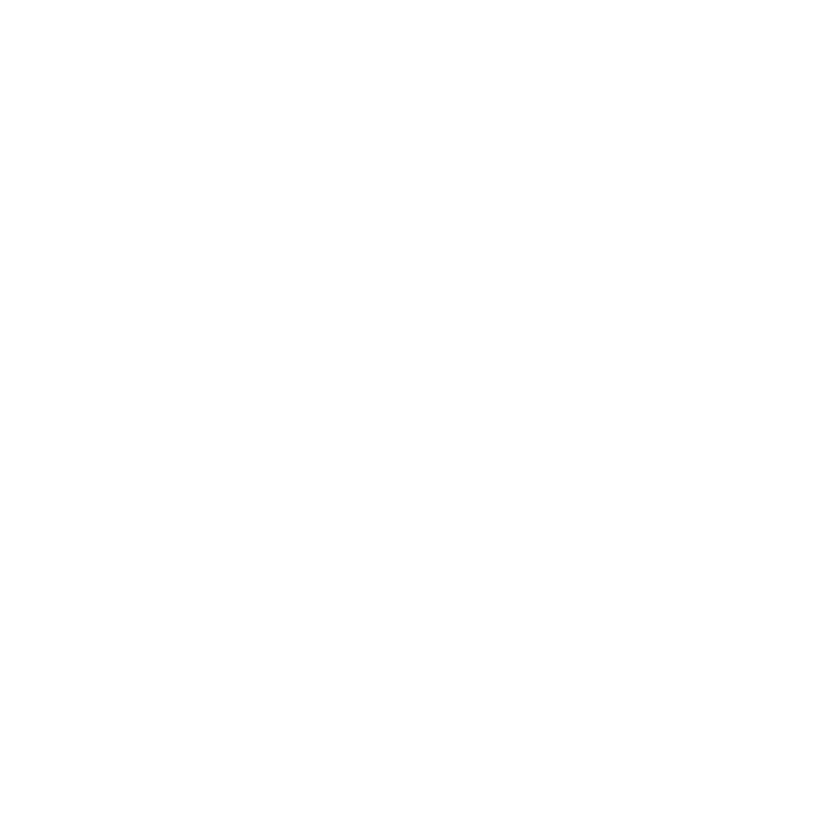

In [280]:
top_twas%>%ggplot(aes(x = reorder(Name,-log(TWAS.P.Adj)), y = Name) )+geom_col()+coord_flip()+facet_grid()



In [194]:
working%>%filter(ID %in% working2$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)

ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000007255,0,3.733568e-01,5.536063e-01,5.806568e-01,0.004,-0.003,-0.003
ENSG00000064666,2,1.038169e-02,5.333433e-03,1.682692e-03,0.086,0.106,0.101
ENSG00000066923,0,4.741720e-01,3.154219e-01,5.371908e-01,0.000,0.012,-0.001
ENSG00000069399,0,5.874498e-01,5.404216e-01,6.036468e-01,-0.003,-0.003,-0.003
ENSG00000073008,1,6.811019e-03,2.171802e-02,1.148262e-02,0.096,0.079,0.063
ENSG00000099377,0,5.624515e-01,5.556673e-01,3.221032e-01,-0.003,-0.003,0.006
ENSG00000100599,0,4.760606e-01,3.956530e-01,2.495076e-01,0.002,0.007,0.011
ENSG00000103496,1,6.611386e-02,4.276323e-02,1.130364e-01,0.037,0.063,0.022
ENSG00000103510,1,5.403043e-03,2.809294e-02,7.390556e-03,0.091,0.077,0.062


In [186]:
cv_dat = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/mv_cv.RData")

The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 3):

    output


The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 4):

    output




In [188]:
cv_dat$output

In [189]:
working2 = cv_dat$output%>%select(-path)
working2 = working2%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working2 = working2%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]%>%p.adjust( method = "fdr")),
 pval_PCC = map_dbl(model,~.x$pval[2]%>%p.adjust( method = "fdr")),
 pval_DLPFC = map_dbl(model,~.x$pval[3]%>%p.adjust( method = "fdr"))
)

In [204]:
gene = working2%>%filter(ID %in% working$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%pull(ID)
working%>%filter(ID %in% working2$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%pull(pval_ac)%>%mean

[1] 0.3157206

In [205]:
gene

[1] "ENSG00000007255" "ENSG00000064666" "ENSG00000066923" "ENSG00000069399"
 [5] "ENSG00000073008" "ENSG00000099377" "ENSG00000100599" "ENSG00000103496"
 [9] "ENSG00000103510" "ENSG00000103549" "ENSG00000104853" "ENSG00000104856"
[13] "ENSG00000106290" "ENSG00000110077" "ENSG00000110079" "ENSG00000120885"
[17] "ENSG00000129250" "ENSG00000130204" "ENSG00000130208" "ENSG00000143224"
[21] "ENSG00000158864" "ENSG00000158869" "ENSG00000159840" "ENSG00000166508"
[25] "ENSG00000167394" "ENSG00000168090" "ENSG00000170604" "ENSG00000170684"
[29] "ENSG00000177051" "ENSG00000178226" "ENSG00000179846" "ENSG00000186567"
[33] "ENSG00000196118" "ENSG00000196126" "ENSG00000203710" "ENSG00000204267"
[37] "ENSG00000204287" "ENSG00000204310" "ENSG00000204314" "ENSG00000221838"
[41] "ENSG00000234906"

In [215]:
cv_gene = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg//to_be_cv_rg_ls_anno",delim = "\t")

Parsed with column specification:
cols(
  `#chr` = col_double(),
  start_position = col_double(),
  end_position = col_double(),
  gene_ID = col_character(),
  name = col_character()
)



In [209]:
k = cv_gene$`#region`

In [216]:
cv_gene

#chr,start_position,end_position,gene_ID,name
<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,37231631,37253403,ENSG00000003509,NDUFAF7
7,11370365,11832198,ENSG00000005108,THSD7A
19,45162928,45178237,ENSG00000007255,TRAPPC6A
19,45668221,45683722,ENSG00000010310,GIPR
19,45692403,45703989,ENSG00000011478,QPCTL
19,45407334,45478828,ENSG00000012061,ERCC1
19,1026586,1039068,ENSG00000064666,CNN2
7,100177563,100221488,ENSG00000066923,STAG3
19,44747705,44760044,ENSG00000069399,BCL3
